In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

Naive Bayes learn via probability, and regression learns via errors. The next group of models learn from similarity (hence the name similarity models). First is nearest neighbor

### Nearest Neighbor
In the example below, we're classifying a song as rock or jazz based on duration in seconds and loudness.

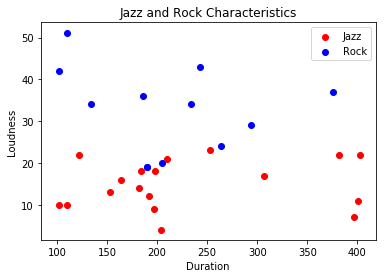

In [2]:
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]


# Look at our data.
plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color='red'
)
plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color='blue'
)
plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

The simplest form of this model just classifies an observation as having the same outcome variable (a category in this case) as the observation in our training data that is most similar in terms of the model variables. The method for calculating the "distance" between two points (in order to pick the one with the least), is usually Euclidean distance, used in geometry. This is basically a generalization of the Pythagorean Theorem into n-dimensions and is done by squaring the residuals by variable, summing them, and then sqrting the results.
$$ \sqrt{(x_1-w_1)^2 + (x_2-w_2)^2+...+(x_n-w_n)^2} $$
Sklearn has a model, KNeighborsClassifier, that can do this for us. Note that we're using an example with two possible categories, but there could be much more used.

In [3]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a song with 24 loudness that's 190 seconds long.
neighbors.predict([[24, 190]])

array([0])

Note in the above that the 0 represents that the model predicts this song is not jazz (since we chose that as the outcome variable).

# K Nearest Neighbors
K nearest neighbors is an extension of nearest neighbor modeling, wherein we look at the k closest neighbors. Each of the k neighbors get to "vote" for what the classifier should be. This has a few advantages:
- It is is less overfit to the training data than nearest neighbor, which explicitly ties predictions as close as possible to the training data. One outlier can create pockets of one category prediction surrounded by a sea of the other category.
- Instead of just predicting classes, there is also an implicit probability offered by the model (votes cast for category/k).
Using sklearn:

In [4]:
neighbors = KNeighborsClassifier(n_neighbors=5)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a 24 loudness, 190 seconds long song.
print(neighbors.predict([[24, 190]]))
print(neighbors.predict_proba([[24, 190]]))

[1]
[[0.4 0.6]]


Notice in the above that when we switch to KNN, there were 3 votes for jazz and 2 for rock, so it is categorized as the former even though it's nearest neighbor is rock as we saw in the prior example.

We can visualize the bounds of the decision with something called a mesh, which allows us to generate a prediction over the whole space. You can see from this where things will be categorized based on their values.

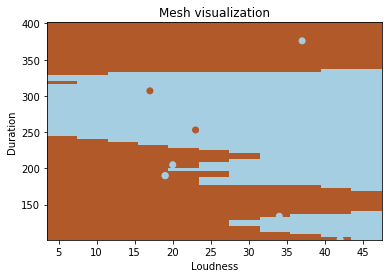

In [5]:
# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size, in other words the step or the pixelation used in the chart
h = 4.0

# Plot the decision boundary. We assign a color to each point in the mesh.
# Meshgrid creates a grid based on coordinates of the two vectors
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [6]:
# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size, in other words the step or the pixelation used in the chart
h = 4.0

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

xx

array([[ 3.5,  7.5, 11.5, 15.5, 19.5, 23.5, 27.5, 31.5, 35.5, 39.5, 43.5,
        47.5],
       [ 3.5,  7.5, 11.5, 15.5, 19.5, 23.5, 27.5, 31.5, 35.5, 39.5, 43.5,
        47.5],
       [ 3.5,  7.5, 11.5, 15.5, 19.5, 23.5, 27.5, 31.5, 35.5, 39.5, 43.5,
        47.5],
       [ 3.5,  7.5, 11.5, 15.5, 19.5, 23.5, 27.5, 31.5, 35.5, 39.5, 43.5,
        47.5],
       [ 3.5,  7.5, 11.5, 15.5, 19.5, 23.5, 27.5, 31.5, 35.5, 39.5, 43.5,
        47.5],
       [ 3.5,  7.5, 11.5, 15.5, 19.5, 23.5, 27.5, 31.5, 35.5, 39.5, 43.5,
        47.5],
       [ 3.5,  7.5, 11.5, 15.5, 19.5, 23.5, 27.5, 31.5, 35.5, 39.5, 43.5,
        47.5],
       [ 3.5,  7.5, 11.5, 15.5, 19.5, 23.5, 27.5, 31.5, 35.5, 39.5, 43.5,
        47.5],
       [ 3.5,  7.5, 11.5, 15.5, 19.5, 23.5, 27.5, 31.5, 35.5, 39.5, 43.5,
        47.5],
       [ 3.5,  7.5, 11.5, 15.5, 19.5, 23.5, 27.5, 31.5, 35.5, 39.5, 43.5,
        47.5],
       [ 3.5,  7.5, 11.5, 15.5, 19.5, 23.5, 27.5, 31.5, 35.5, 39.5, 43.5,
        47.5],
       [ 3.5,  7.5, 1

In [15]:
np.meshgrid([0,1,2],[3,4,5])

[array([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]), array([[3, 3, 3],
        [4, 4, 4],
        [5, 5, 5]])]

In [8]:
yy

array([[101.5, 101.5, 101.5, 101.5, 101.5, 101.5, 101.5, 101.5, 101.5,
        101.5, 101.5, 101.5],
       [105.5, 105.5, 105.5, 105.5, 105.5, 105.5, 105.5, 105.5, 105.5,
        105.5, 105.5, 105.5],
       [109.5, 109.5, 109.5, 109.5, 109.5, 109.5, 109.5, 109.5, 109.5,
        109.5, 109.5, 109.5],
       [113.5, 113.5, 113.5, 113.5, 113.5, 113.5, 113.5, 113.5, 113.5,
        113.5, 113.5, 113.5],
       [117.5, 117.5, 117.5, 117.5, 117.5, 117.5, 117.5, 117.5, 117.5,
        117.5, 117.5, 117.5],
       [121.5, 121.5, 121.5, 121.5, 121.5, 121.5, 121.5, 121.5, 121.5,
        121.5, 121.5, 121.5],
       [125.5, 125.5, 125.5, 125.5, 125.5, 125.5, 125.5, 125.5, 125.5,
        125.5, 125.5, 125.5],
       [129.5, 129.5, 129.5, 129.5, 129.5, 129.5, 129.5, 129.5, 129.5,
        129.5, 129.5, 129.5],
       [133.5, 133.5, 133.5, 133.5, 133.5, 133.5, 133.5, 133.5, 133.5,
        133.5, 133.5, 133.5],
       [137.5, 137.5, 137.5, 137.5, 137.5, 137.5, 137.5, 137.5, 137.5,
        137.5, 137.5

In [9]:
np.c_[xx.ravel(), yy.ravel()]

array([[  3.5, 101.5],
       [  7.5, 101.5],
       [ 11.5, 101.5],
       ...,
       [ 39.5, 401.5],
       [ 43.5, 401.5],
       [ 47.5, 401.5]])

Note that in the mesh grid, you see the expected areas where the model predicts an observation to be jazz or rock based on their variable coordinates. However, you see points where the predictions were incorrect. The jaggedness is affected by the h=4, or step we're using. If we make that a higher number, there will be less jaggedness but more computationally intensive.

# Creating nearest neighbor algorithm from scratch

In [16]:
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]

In [138]:
def Nearest_Neighbors(var_col1,var_col2,outcome_var,k,input1,input2):
    
    distances = np.array([])
    
    # Calculate distance to the available data points
    for x,y in zip(var_col1,var_col2):
        distance = np.sqrt(((input1 - x)**2) + ((input2 - y)**2))
        distances = np.append(distances,distance)
        
    # Find indices of minimum k distances
    nearest_indices = distances.argsort()[:k]
    
    # Locating those indices' outcome values and adding them to a numpy array
    nearest_neighbors = np.array(outcome_var[nearest_indices])
    
    # Calculating probabilities
    outcometrue = (sum(nearest_neighbors)/len(nearest_neighbors))
    outcomefalse = 1 - outcometrue
    roundedoutcome = int(np.rint(outcometrue))
        
    output = np.array([roundedoutcome,outcometrue,outcomefalse])
    
    return roundedoutcome,outcometrue,outcomefalse,nearest_neighbors,nearest_indices

In [140]:
Nearest_Neighbors(music['loudness'],music['duration'],music['jazz'],5,24,190)

(1, 0.6, 0.4, array([0, 0, 1, 1, 1]), array([16, 25,  0, 21, 17]))

In [127]:
neighbors = KNeighborsClassifier(n_neighbors=5)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a 24 loudness, 190 seconds long song.
print(neighbors.predict([[24, 190]]))
print(neighbors.predict_proba([[24, 190]]))
print(neighbors.kneighbors([[24,190]],5,return_distance=False))

[1]
[[0.4 0.6]]
[[16 25  0 21 17]]


Matches sklearn.